## 20 Newsgroups

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn import datasets, model_selection
import tarfile
import re
import os
import pandas as pd

Getting category names, i.e. folder names of 20 newsgroups folder

In [2]:
path = "20_newsgroups"
for root, dirs, files in os.walk(path, topdown=False):
    newsgroups = np.array(dirs)
print newsgroups

['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


Reading files from first folder. Just use a for loop to read in from more folders.

In [3]:
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(newsgroups)):
    x = []
    y=[]
    path = "20_newsgroups" + "/" + newsgroups[i]
    for root, dirs, files in os.walk(path):
        for name in files:
            f = open(path + "/" + name)
            x.append(f.read())
            y.append(newsgroups[i])
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.3, random_state = 1)
    x_train.extend(X_train)
    x_test.extend(X_test)
    y_train.extend(Y_train)
    y_test.extend(Y_test)
#print x[1]

In [4]:
print len(x_train)
print len(x_test)
print len(y_train)
print len(y_test)

13997
6000
13997
6000


In [5]:
y_train = pd.DataFrame(y_train, columns = ['y_train'])
print 'Counts for each category \n%s.' % y_train.y_train.value_counts()

y_test = pd.DataFrame(y_test, columns = ['y_test'])
print 'Counts for each category \n%s.' % y_test.y_test.value_counts()

Counts for each category 
comp.os.ms-windows.misc     700
comp.windows.x              700
rec.motorcycles             700
sci.med                     700
talk.politics.mideast       700
rec.sport.baseball          700
comp.graphics               700
comp.sys.ibm.pc.hardware    700
rec.autos                   700
misc.forsale                700
sci.electronics             700
sci.space                   700
talk.politics.guns          700
talk.politics.misc          700
rec.sport.hockey            700
comp.sys.mac.hardware       700
sci.crypt                   700
talk.religion.misc          700
alt.atheism                 700
soc.religion.christian      697
Name: y_train, dtype: int64.
Counts for each category 
talk.politics.guns          300
sci.space                   300
rec.motorcycles             300
sci.med                     300
talk.politics.misc          300
talk.politics.mideast       300
rec.sport.hockey            300
comp.sys.mac.hardware       300
rec.sport.baseball     

Obtain metadatas From, Subject, Date, Organization, Sender from the headers of each file. Obtain Content from the body of each file and place in the original dataframe.

In [6]:
# Creating the dataframe and assigning columns
def create_dataframe(x): 
    original = pd.DataFrame()
    original = original.assign(From = [])
    original = original.assign(Subject = [])
    original = original.assign(Date = [])
    original = original.assign(Organization = [])
    original = original.assign(Sender = [])
    original = original.assign(Content = [])
    original = original.assign(Lines = [])
    original['From'] = original['From'].astype(str)
    original['Subject'] = original['Subject'].astype(str)
    original['Date'] = original['Date'].astype(str)
    original['Organization'] = original['Organization'].astype(str)
    original['Sender'] = original['Sender'].astype(str)
    original['Content'] = original['Content'].astype(str)
    original['Lines'] = original['Lines'].astype(str)
    #print original.dtypes

    # Placing the metadatas and content in the respective cells of the dataframe
    for i in range(len(x)):
        data = x[i].split("\n\n", 1)
        email_content = ''
        meta = sorted(data[0].split("\n"))
        for k in meta:
            z = np.array(k.split(":", 1))
            if list(original).__contains__(z[0]):
                try:
                    original.at[i, z[0]] = z[1]
                except ValueError:
                    original.at[i, z[0]] = np.NaN
        original.at[i, 'Content'] = data[1]
    return original

In [7]:
train_x = create_dataframe(x_train)
train_x.count()

From            13997
Subject         13997
Date            13997
Organization    13415
Sender           7618
Content         13997
Lines           13953
dtype: int64

In [8]:
test_x = create_dataframe(x_test)
test_x.count()

From            6000
Subject         6000
Date            6000
Organization    5730
Sender          3254
Content         6000
Lines           5984
dtype: int64

Saving to csv

In [9]:
train_x.to_csv('train_x.csv')
test_x.to_csv('test_x.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

## Emails
Extract email address from From and Sender column. From and Sender names were not considered as not much info can be gotten. 
Flag whether the document is from an educational institution by checking the domain for .edu
Extra: extract domain, country etc

In [10]:
def process_emails(original):
    # Extracting the email addresses from From column
    original['Email_from'] = original.From.map(lambda x : re.search(r'[\w\.-]+@[\w\.-]+', x).group(0) if re.search(r'[\w\.-]+@[\w\.-]+', x) is not None else np.NaN)

    # Extracting the email addresses from Sender column
    original['Email_sender'] = original.Sender.map(lambda x : np.NaN if pd.isnull(x) else re.search(r'[\w\.-]+@[\w\.-]+', x).group(0) if re.search(r'[\w\.-]+@[\w\.-]+', x) is not None else np.NaN)

    # flag as educational organisation if the email address has .edu domain
    original['Edu_org'] = original.Email_from.map(lambda x : 1 if isinstance(x, basestring) and x[len(x) - 3:].find('edu') is not -1 else 0)
    return original

In [11]:
train_x = process_emails(train_x)
train_x.head()

,From,Subject,Date,Organization,Sender,Content,Lines,Email_from,Email_sender,Edu_org
0,livesey@solntze.wpd.sgi.com (Jon Livesey),Re: Yet more Rushdie [Re: ISLAMIC LAW],23 Apr 1993 21:02:00 GMT,sgi,NaN,"In article <116533@bu.edu>, jaeger@buphy.bu.ed...",27,livesey@solntze.wpd.sgi.com,NaN,0
1,halat@pooh.bears (Jim Halat),"Re: After 2000 years, can we say that Christi...",23 Apr 93 18:50:18 GMT,NaN,news@bear.com,"In article <markp.735230393@elvis.wri.com>, ma...",25,halat@pooh.bears,news@bear.com,0
2,sham@cs.arizona.edu (Shamim Zvonko Mohamed),Re: Death Penalty / Gulf War (long),21 Apr 93 20:33:53 GMT,"U of Arizona CS Dept, Tucson",NaN,This is the most unmitigated bilge I've seen i...,62,sham@cs.arizona.edu,NaN,1
3,dewey@risc.sps.mot.com (Dewey Henize),Re: sci.skeptic.religion (Was: Why ALT.atheism?),13 Apr 1993 18:43:48 -0500,"Motorola, Inc. -- Austin,TX",NaN,In article <93103.071613J5J@psuvm.psu.edu> Joh...,33,dewey@risc.sps.mot.com,NaN,0
4,mathew <mathew@mantis.co.uk>,"Re: After 2000 years, can we say that Christi...","Wed, 21 Apr 1993 10:25:25 +0100","Mantis Consultants, Cambridge. UK.",NaN,frank@D012S658.uucp (Frank O'Dwyer) writes:\n>...,21,mathew@mantis.co.uk,NaN,0


## Subject
For Subject, remove Re: (maybe indicate that its a reply message), throw to content

In [12]:
def process_subject(original):
    # Process the subject to remove Re:
    original['Subject_processed'] = original.Subject.map(lambda x : x[x.find("FAQ:") + 5:] if x.find("FAQ:") is not -1 
                                                         else x[x.find("Re:") + 4:] if x.find("Re:") is not -1 and x.find("Re", 5) is -1
                                                         else x[x.find("Re:") + 4:x.find("Re", 5)] if x.find("Re:") is not -1
                                                         else x)

    # Reply_msg = 1 if the document is a reply message, otherwise 0
    original['Reply_msg'] = original.Subject.map(lambda x : 1 if x.find("Re:") == 1 else 0)

    # Adds the processed subject to Content column
    original['Content'] = original.Content + " " + original.Subject_processed

    # Removes Subject_processed column as they are appended to content column
    del original['Subject_processed']
    return original

In [13]:
train_x = process_subject(train_x)
train_x.head()

,From,Subject,Date,Organization,Sender,Content,Lines,Email_from,Email_sender,Edu_org,Reply_msg
0,livesey@solntze.wpd.sgi.com (Jon Livesey),Re: Yet more Rushdie [Re: ISLAMIC LAW],23 Apr 1993 21:02:00 GMT,sgi,NaN,"In article <116533@bu.edu>, jaeger@buphy.bu.ed...",27,livesey@solntze.wpd.sgi.com,NaN,0,1
1,halat@pooh.bears (Jim Halat),"Re: After 2000 years, can we say that Christi...",23 Apr 93 18:50:18 GMT,NaN,news@bear.com,"In article <markp.735230393@elvis.wri.com>, ma...",25,halat@pooh.bears,news@bear.com,0,1
2,sham@cs.arizona.edu (Shamim Zvonko Mohamed),Re: Death Penalty / Gulf War (long),21 Apr 93 20:33:53 GMT,"U of Arizona CS Dept, Tucson",NaN,This is the most unmitigated bilge I've seen i...,62,sham@cs.arizona.edu,NaN,1,1
3,dewey@risc.sps.mot.com (Dewey Henize),Re: sci.skeptic.religion (Was: Why ALT.atheism?),13 Apr 1993 18:43:48 -0500,"Motorola, Inc. -- Austin,TX",NaN,In article <93103.071613J5J@psuvm.psu.edu> Joh...,33,dewey@risc.sps.mot.com,NaN,0,1
4,mathew <mathew@mantis.co.uk>,"Re: After 2000 years, can we say that Christi...","Wed, 21 Apr 1993 10:25:25 +0100","Mantis Consultants, Cambridge. UK.",NaN,frank@D012S658.uucp (Frank O'Dwyer) writes:\n>...,21,mathew@mantis.co.uk,NaN,0,1


## Date
For Date, extract month and year (year seems to be all in 1993)

In [14]:
def process_date(original):
    # Extracting the Month from the Date column
    month_dict = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    original['Month'] = original.Date.map(lambda y : ''.join(filter(lambda x: x.lower() in month_dict, y.split())))

    # Extracting the Year from the Date column
    original['Year'] = original.Date.map(lambda x : ''.join([x[x.lower().find(i):].split(' ')[1] for i in month_dict if x.lower().find(i) is not -1]))
    original['Year'] = original.Year.map(lambda x : x[2:] if len(x) is 4 else x)
    return original

In [15]:
train_x = process_date(train_x)
train_x.head()

,From,Subject,Date,Organization,Sender,Content,Lines,Email_from,Email_sender,Edu_org,Reply_msg,Month,Year
0,livesey@solntze.wpd.sgi.com (Jon Livesey),Re: Yet more Rushdie [Re: ISLAMIC LAW],23 Apr 1993 21:02:00 GMT,sgi,NaN,"In article <116533@bu.edu>, jaeger@buphy.bu.ed...",27,livesey@solntze.wpd.sgi.com,NaN,0,1,Apr,93
1,halat@pooh.bears (Jim Halat),"Re: After 2000 years, can we say that Christi...",23 Apr 93 18:50:18 GMT,NaN,news@bear.com,"In article <markp.735230393@elvis.wri.com>, ma...",25,halat@pooh.bears,news@bear.com,0,1,Apr,93
2,sham@cs.arizona.edu (Shamim Zvonko Mohamed),Re: Death Penalty / Gulf War (long),21 Apr 93 20:33:53 GMT,"U of Arizona CS Dept, Tucson",NaN,This is the most unmitigated bilge I've seen i...,62,sham@cs.arizona.edu,NaN,1,1,Apr,93
3,dewey@risc.sps.mot.com (Dewey Henize),Re: sci.skeptic.religion (Was: Why ALT.atheism?),13 Apr 1993 18:43:48 -0500,"Motorola, Inc. -- Austin,TX",NaN,In article <93103.071613J5J@psuvm.psu.edu> Joh...,33,dewey@risc.sps.mot.com,NaN,0,1,Apr,93
4,mathew <mathew@mantis.co.uk>,"Re: After 2000 years, can we say that Christi...","Wed, 21 Apr 1993 10:25:25 +0100","Mantis Consultants, Cambridge. UK.",NaN,frank@D012S658.uucp (Frank O'Dwyer) writes:\n>...,21,mathew@mantis.co.uk,NaN,0,1,Apr,93


Checking the columns of original dataframe

In [17]:
list(train_x)

['From',
 'Subject',
 'Date',
 'Organization',
 'Sender',
 'Content',
 'Lines',
 'Email_from',
 'Email_sender',
 'Edu_org',
 'Reply_msg',
 'Month',
 'Year']

The following shows that some columns have missing values, such as Organisation, Sender, Lines, Email_from, and Email_sender (might need to remove email_from and email_sender and subject)

In [18]:
train_x.count()

From            13997
Subject         13997
Date            13997
Organization    13415
Sender           7618
Content         13997
Lines           13953
Email_from      13750
Email_sender     7431
Edu_org         13997
Reply_msg       13997
Month           13997
Year            13997
dtype: int64

Sanity check, when using full dataset, if all years are in 93, remove the column

In [19]:
train_x.groupby('Year').count()['Content']

Year
92        2
93    13995
Name: Content, dtype: int64

After checking, all years (except two cases) are in 1993 so year column is removed.

In [20]:
del train_x['Year']
print list(train_x)

['From', 'Subject', 'Date', 'Organization', 'Sender', 'Content', 'Lines', 'Email_from', 'Email_sender', 'Edu_org', 'Reply_msg', 'Month']


Checking the Month Column, we see that there is one entry which is empty. Further checks shows that it is because the month is spelt as April instead of the usual Apr, therefore the discrepancy.

In [21]:
train_x.groupby('Month').count()['Content']

Month
           1
APR       20
Apr    12836
Feb        2
Jun        2
MAY        3
Mar       17
May     1116
Name: Content, dtype: int64

In [23]:
emp = ''
for i in range(len(train_x.Month)):
    if train_x.Month[i] == '':
        emp = i
print train_x.Date[emp]
train_x.at[emp, 'Month'] = 'Apr'
train_x.groupby('Month').count()['Content']

 Wednesday, 14 April 1993 12:14:23 MST


Month
APR       20
Apr    12837
Feb        2
Jun        2
MAY        3
Mar       17
May     1116
Name: Content, dtype: int64

## Educational Organisation

Edu_org
0    8966
1    5031
Name: Content, dtype: int64


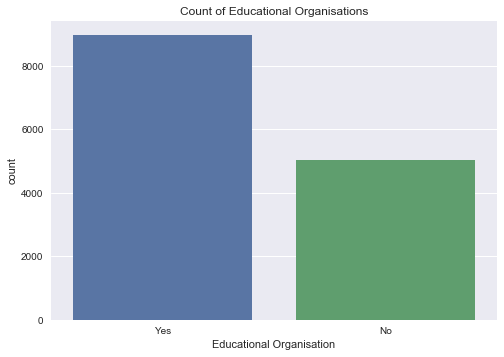

In [24]:
print train_x.groupby('Edu_org').count()['Content']
ax = seaborn.countplot(x='Edu_org', data=train_x)
ax.set(title = 'Count of Educational Organisations', xlabel = 'Educational Organisation', xticklabels = ["Yes", 'No'])
plt.show()

Reply_msg
0    4737
1    9260
Name: Content, dtype: int64


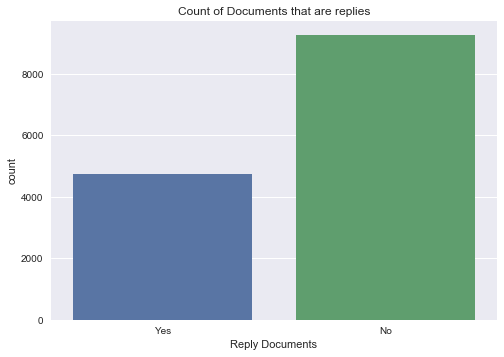

In [25]:
print train_x.groupby('Reply_msg').count()['Content']
ax = seaborn.countplot(x='Reply_msg', data=train_x)
ax.set(title = 'Count of Documents that are replies', xlabel = 'Reply Documents', xticklabels = ["Yes", 'No'])
plt.show()

In [26]:
train_x.groupby('Organization').count()['Content']

Organization
  Colorado Concert Sound                                            1
  Personal Opinions Inc.                                            1
  Silicon Graphics, Inc.  Mountain View, CA                         2
  University of Wisconsin Academic Computing Center                 4
  University of Wisconsin Chemistry Computing Center                1
  Wright State University                                          10
 "A World of Information at your Fingertips"                        1
 "Computervision"                                                   2
 "Intergraph Electronics, Mountain View, CA"                        4
 "Lockheed Austin Division, 6800 Burleson Rd, Austin, TX 78744      1
 "The Private Site of Manfredo Tichauer"                            1
 "Well, a head on top, an arm on each side, two legs...."           2
 'Operation: Mindcrime'                                             2
 'Vilse i Pannkakan'-survivors Anonymous                            1
 (N.) T